# Test for ABC with updating prior

## Simulation and ABC Method

## Assessment of ABC results

In [67]:
import pandas as pd
from ggplot import *

In [78]:
def create_PosteriorCharacteristics_df(observed_file_name, PosteriorCharacteristics_file_name, obs, chrom):
    observed_df = pd.read_csv(observed_file_name, sep='\t')
    observed_df.drop([col for col in observed_df.columns if 'CGI' in col], axis=1, inplace=True)
    PosteriorCharacteristics_df = pd.read_csv(PosteriorCharacteristics_file_name, sep='\t')
    
    PosteriorCharacteristics_observed_df = pd.concat([observed_df, PosteriorCharacteristics_df], axis=1)
    PosteriorCharacteristics_observed_df['obs'] = obs
    PosteriorCharacteristics_observed_df['chr'] = chrom
    PosteriorCharacteristics_observed_df.drop('dataSet', axis=1, inplace=True)
    return PosteriorCharacteristics_observed_df

def combine_obs_chrom_PosteriorCharacteristics(results_path, obs_list, chrom_list):
    combined_PosteriorCharacteristics_observed_df = pd.DataFrame()
    for obs in obs_list:
        for chrom in chrom_list:
            observed_file_name = '{}/obs{}/chr{}/ABC/results_param_observed.txt'.format(results_path, obs, chrom)
            PosteriorCharacteristics_file_name = '{}/obs{}/chr{}/ABC/ABC_update_estimate_10pls_100ret_model0_MarginalPosteriorCharacteristics.txt'.format(results_path, obs, chrom)
            PosteriorCharacteristics_observed_df = create_PosteriorCharacteristics_df(observed_file_name, PosteriorCharacteristics_file_name, obs, chrom)

            combined_PosteriorCharacteristics_observed_df = pd.concat([combined_PosteriorCharacteristics_observed_df, PosteriorCharacteristics_observed_df])

    return combined_PosteriorCharacteristics_observed_df


def boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df):
    estimate = '{}_mode'.format(param)
    estimate_dist_name = '{}_estimate_dist'.format(param)
    combined_PosteriorCharacteristics_observed_df[estimate_dist_name] = (combined_PosteriorCharacteristics_observed_df[estimate] - combined_PosteriorCharacteristics_observed_df[param])**2
    
    plot = ggplot(aes(x = 'chr', y = estimate_dist_name), data = combined_PosteriorCharacteristics_observed_df) + \
        geom_boxplot() + \
        theme_bw()
        
    return [plot, combined_PosteriorCharacteristics_observed_df]
    

In [77]:
results_path = '/vol_c/ABC_update'
obs_list = list(range(1, 10))
chrom_list = list(range(1, 11))

combined_PosteriorCharacteristics_observed_df = combine_obs_chrom_PosteriorCharacteristics(results_path, obs_list, chrom_list)
parameters = list(combined_PosteriorCharacteristics_observed_df)[0:7]

### Box plot of the squared difference of the parameter estimate from the observed value for each chromosome
Ideally, each successive chromosome should reduce the squared difference from the observed value

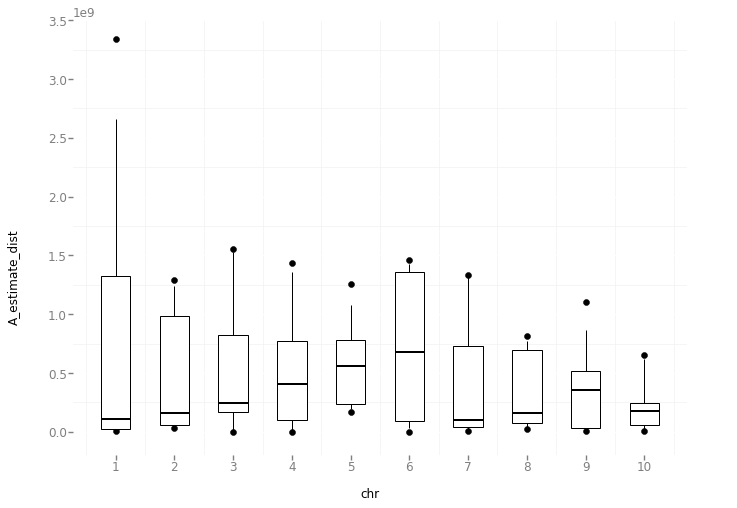

<ggplot: (-9223363295959940643)>


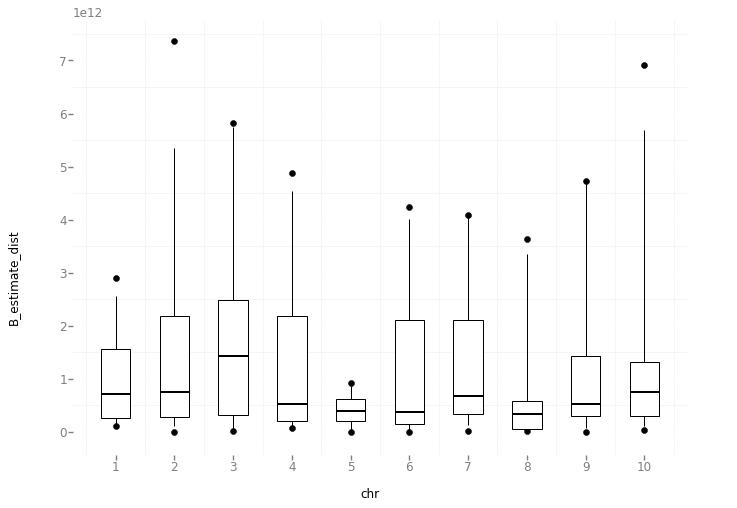

<ggplot: (-9223363295960674616)>


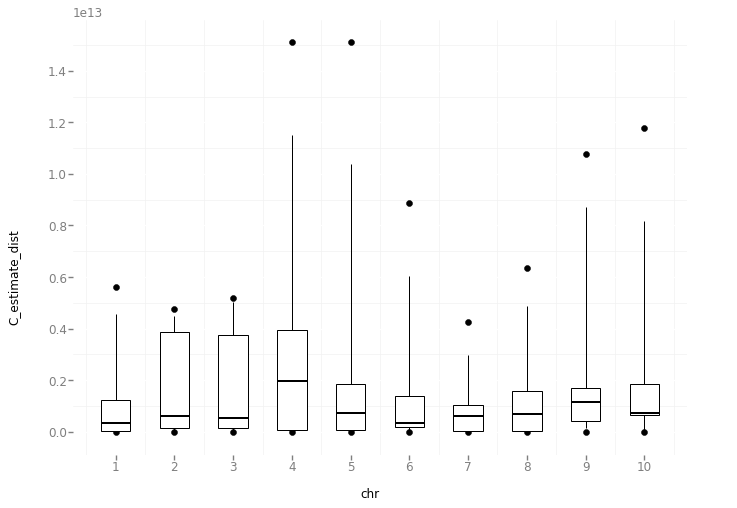

<ggplot: (-9223363295960142532)>


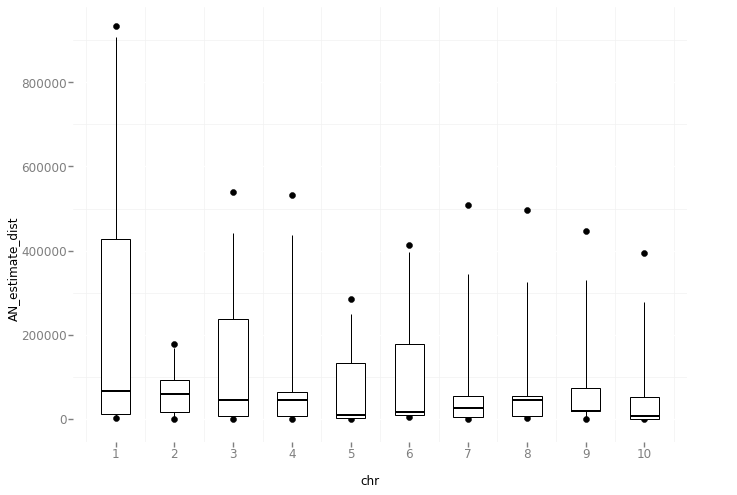

<ggplot: (8740894096497)>


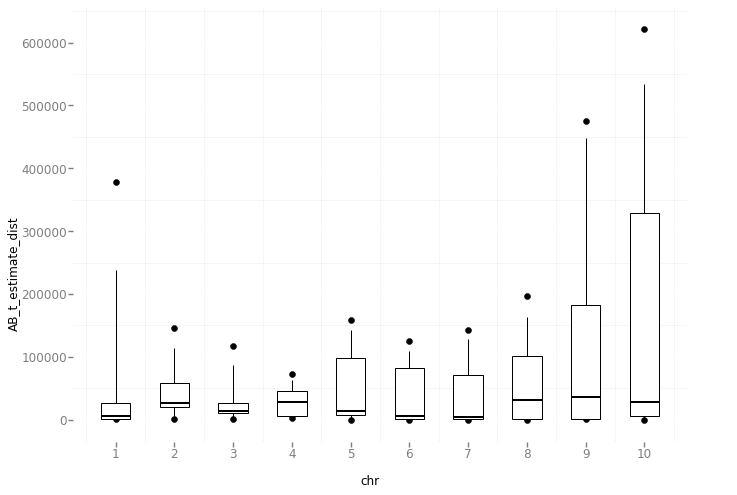

<ggplot: (-9223363295959470192)>


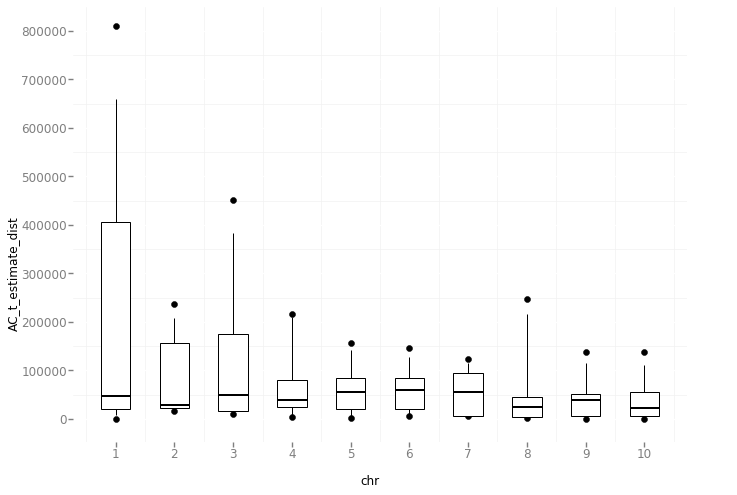

<ggplot: (8740895254690)>


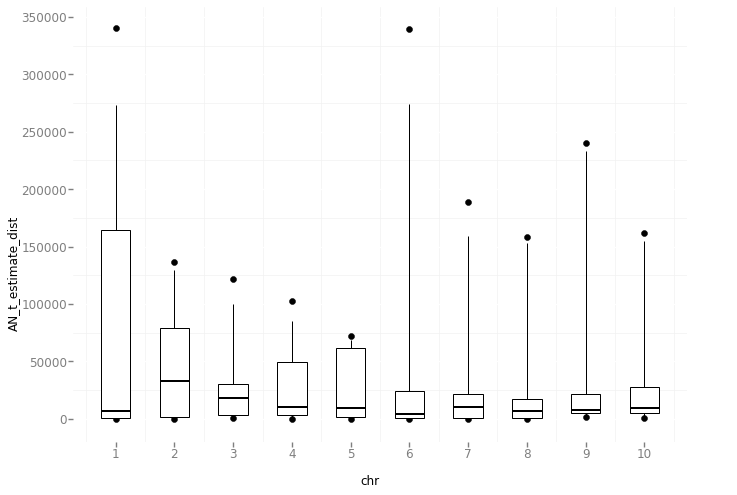

<ggplot: (-9223363295959996181)>


In [82]:
for param in parameters:
    [plot, combined_PosteriorCharacteristics_observed_df] = boxplot_estimate_dist(param, combined_PosteriorCharacteristics_observed_df)
    print(plot)